
# 🦠 COVID-19 India Data Visualization

This project analyzes COVID-19 case data from Indian states and visualizes it using Python libraries like **Pandas**, **Matplotlib**, and **Seaborn**.

---

### 📌 Project Overview

- 📊 **Goal**: Understand the spread and impact of COVID-19 across Indian states through visual storytelling.
- 🛠 **Tools**: Python, Pandas, Seaborn, Matplotlib, Jupyter Notebook
- 🧹 **Process**: Data Cleaning → Visualization → Insight Extraction
- 📚 **Skills**: Data Wrangling, Plotting, Analytical Thinking, Storytelling

---

### 🧭 Key Questions Explored
1. Which states reported the highest confirmed cases?
2. How does recovery compare to death rates in top-affected states?
3. Where are active cases concentrated?
4. How do states compare across all status categories?

---

The visualizations in this notebook help interpret the raw data in ways that are actionable for decision-makers, health professionals, and the general public.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the dataset
df = pd.read_csv("C:/Users/HP/Downloads/Latest Covid-19 India Status.csv")
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


In [40]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Check actual column names
print(df.columns.tolist())

# Create 'active' if not present
if 'active' not in df.columns:
    df['active'] = df['total_cases'] - df['discharged'] - df['deaths']

# Sort the data by total cases
df_sorted = df.sort_values(by='total_cases', ascending=False)


['state/uts', 'total_cases', 'active', 'discharged', 'deaths', 'active_ratio', 'discharge_ratio', 'death_ratio', 'population']


C:\Users\HP\AppData\Local\Temp\ipykernel_3036\2724363481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='state/uts', y='total_cases', palette='Reds_r')


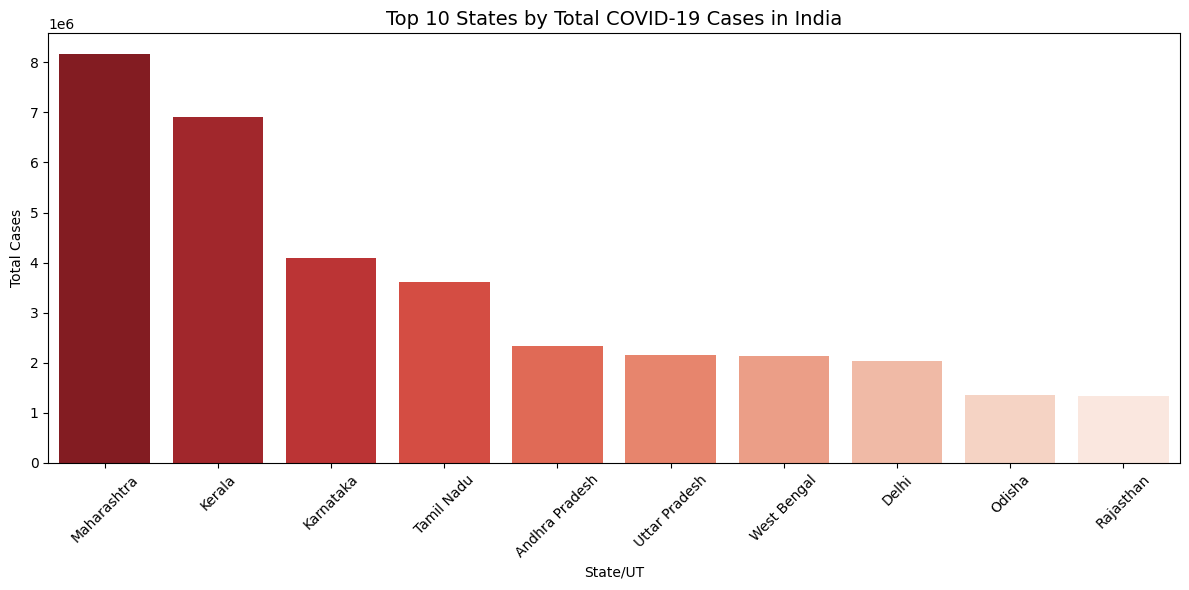

In [41]:
# Select top 10 states
top10 = df_sorted.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='state/uts', y='total_cases', palette='Reds_r')
plt.title('Top 10 States by Total COVID-19 Cases in India', fontsize=14)
plt.xlabel('State/UT')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

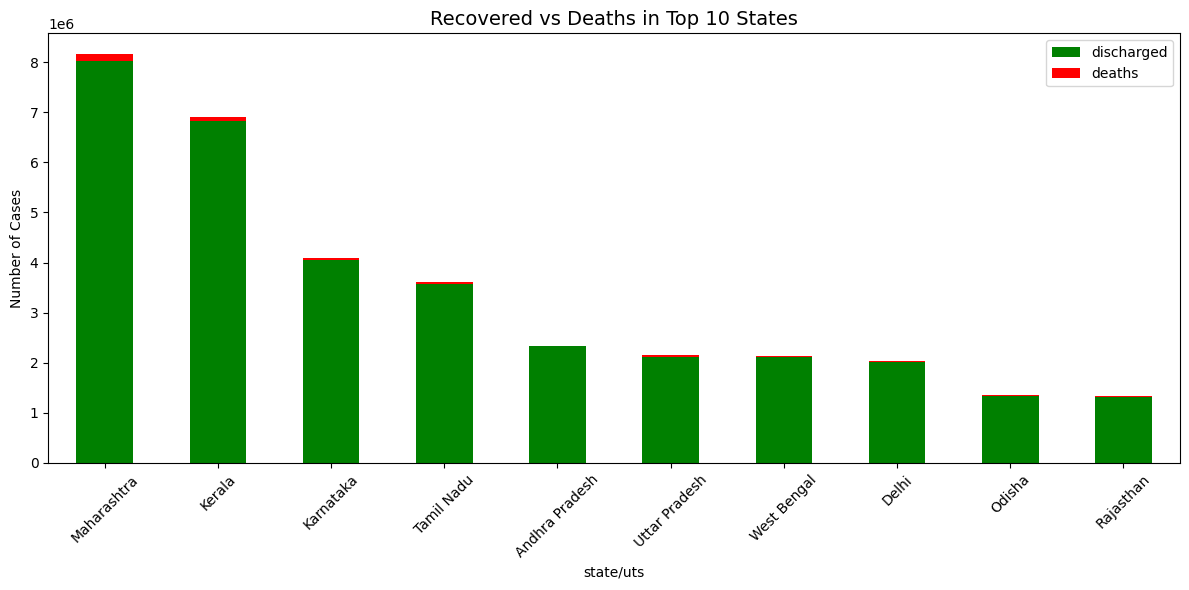

In [42]:
# Recovered vs Deaths 
top10.plot(
    x='state/uts',
    kind='bar',
    stacked=True,
    y=['discharged', 'deaths'],
    figsize=(12,6),
    color=['green', 'red']
)
plt.title('Recovered vs Deaths in Top 10 States', fontsize=14)
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


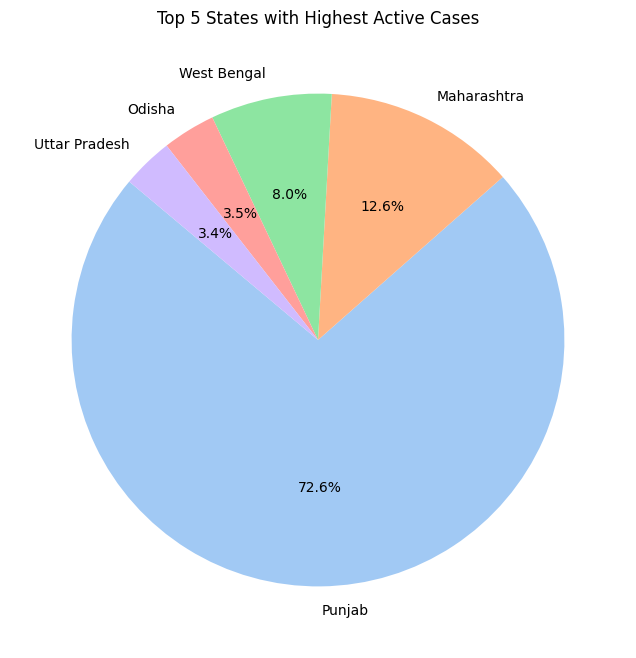

In [43]:
# Top 5 states by active cases
top5_active = df_sorted.nlargest(5, 'active')

plt.figure(figsize=(8,8))
plt.pie(
    top5_active['active'],
    labels=top5_active['state/uts'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Top 5 States with Highest Active Cases')
plt.show()

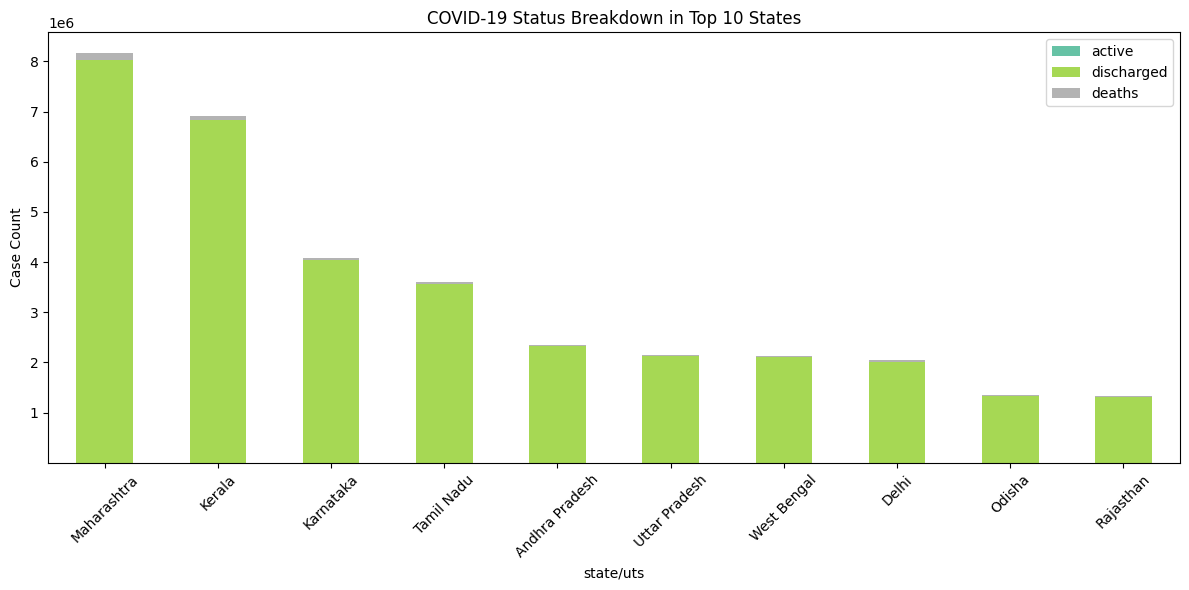

In [44]:
# Create a ratio plot for top 10
top10_plot = top10[['state/uts', 'active', 'discharged', 'deaths']].set_index('state/uts')
top10_plot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('COVID-19 Status Breakdown in Top 10 States')
plt.ylabel('Case Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()